**Please note that this case study is composed of two parts done for Springboard's data analytics bootcamp** 

Part I: Descriptive Statistics for Southern Water Corp
Part II: Inferential Statistics for Southern Water Corp

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data received from Southern Water Corp has been split into two files, one with raw data for pump metrics and one with a rolling standard deviation for those same metrics.


In [28]:
#i 
dataframe_raw = pd.read_csv('DF_Raw_Data.csv', header=0)
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv', header=0)



In [29]:
#ii
print(dataframe_raw.describe())

In [30]:
#ii
print(dataframe_stdev.describe())

In [31]:
#ii
print(dataframe_raw.info())

In [32]:
#ii
print(dataframe_stdev.info())

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Boxplots</span> 

This dataset has (~2,452) entries.

i) Box plot for raw data

ii) Line plot for raw data

AxesSubplot(0.125,0.125;0.775x0.755)


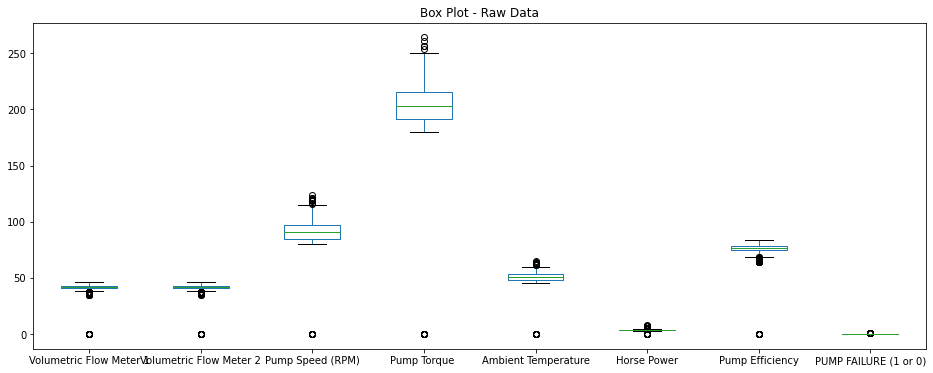

In [33]:
#i create a boxplot visualising this information

print(dataframe_raw.plot(kind='box', figsize=(16,6), title='Box Plot - Raw Data'))

In [46]:
#ii create a lineplot visualizing the information

#**not run to save file size - remove hashes below to run and see plot**

#print(dataframe_raw.plot(figsize=(16,6), title='Line Plot - Raw Data'))

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe.



In [35]:
#i boxplot for raw data specifically for when pump failure = True  ( pump_failure = 1)

#column header has a really ugly name, I'm giving it a new one

dataframe_raw.rename(columns={'PUMP FAILURE (1 or 0)' : 'pump_failure'}, inplace=True)
dataframe_stdev.rename(columns={'PUMP FAILURE (1 or 0)': 'pump_failure'}, inplace=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


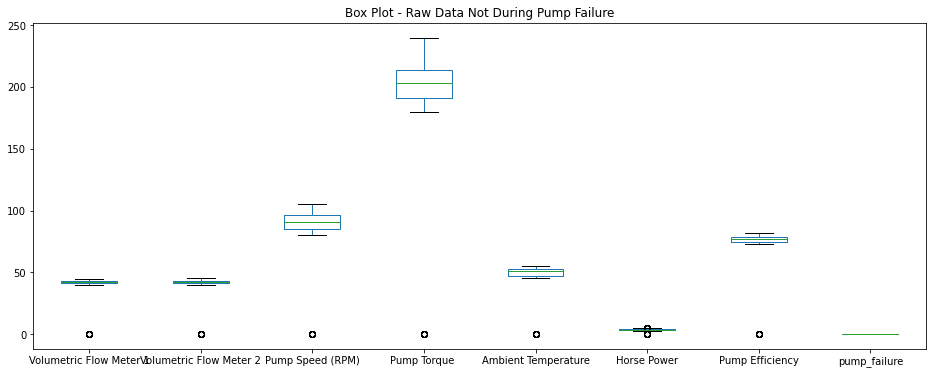

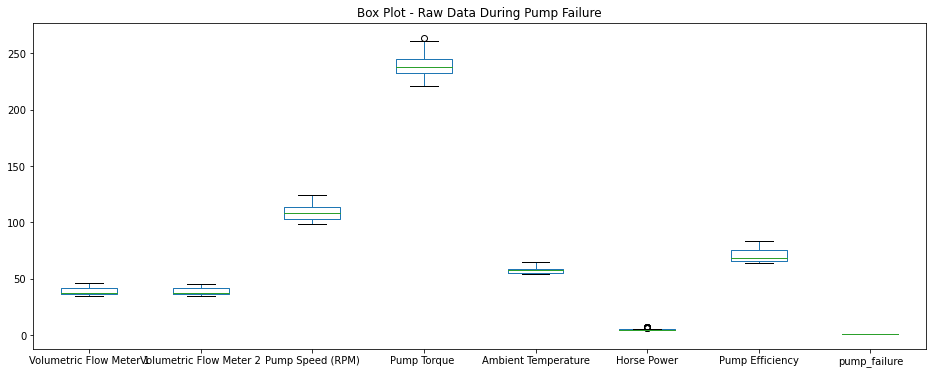

In [36]:
#create a subset of data where pump_failure = 1 with raw dataset

pump_not_fail_raw = dataframe_raw[(dataframe_raw.pump_failure == 0)]

print(pump_not_fail_raw.plot(kind='box', figsize=(16,6), title='Box Plot - Raw Data Not During Pump Failure'))

pump_fail_raw = dataframe_raw[(dataframe_raw.pump_failure == 1)]

print(pump_fail_raw.plot(kind='box', figsize=(16,6), title='Box Plot - Raw Data During Pump Failure'))



AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


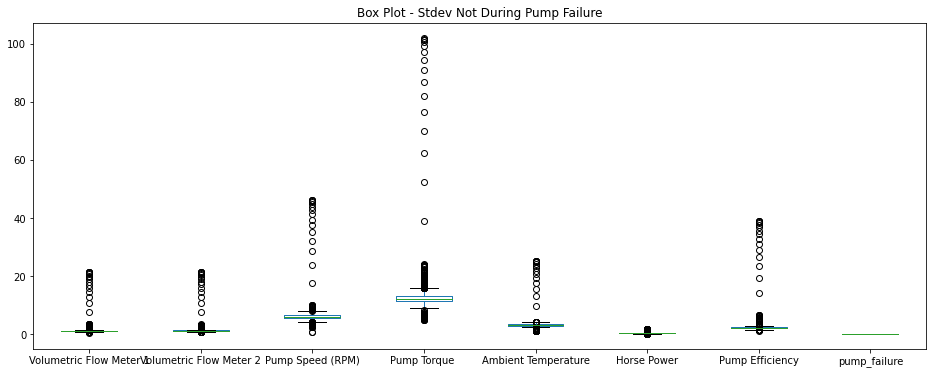

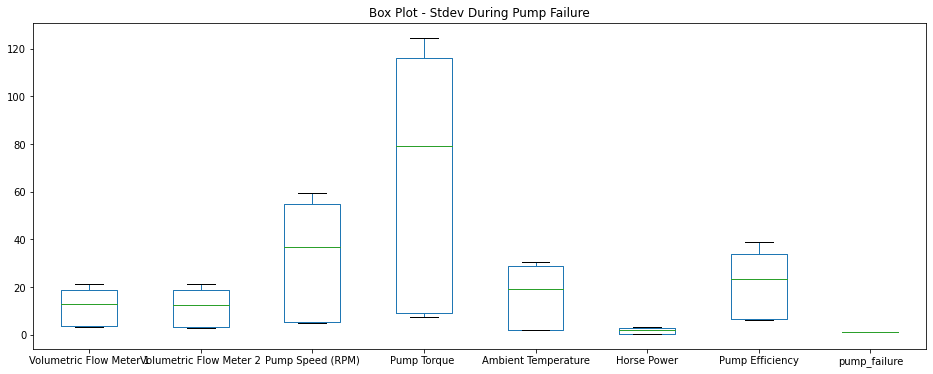

In [37]:
#create a subset of data where pump_failure with rolling standard deviation set = 0

pump_no_fail_stdev = dataframe_stdev[(dataframe_stdev.pump_failure == 0)]

print(pump_no_fail_stdev.plot(kind='box', figsize=(16,6), title='Box Plot - Stdev Not During Pump Failure'))

pump_fail_stdev = dataframe_stdev[(dataframe_stdev.pump_failure == 1)]

print(pump_fail_stdev.plot(kind='box', figsize=(16,6), title='Box Plot - Stdev During Pump Failure'))

There are significant changes to the rolling standard deviation values when there is a pump failure!

### Step 5: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. 

Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [38]:
#i create Q1 and Q3 for each dataset
Q1_raw = dataframe_raw.quantile(0.25)
Q3_raw = dataframe_raw.quantile(0.75)
Q1_stdev = dataframe_stdev.quantile(0.25)
Q3_stdev = dataframe_stdev.quantile(0.75)

#ii calc IQR
IQR_raw = Q3_raw - Q1_raw
IQR_stdev = Q3_raw - Q1_raw

#ii print
print('Raw dataset: ')
print(IQR_raw)
print('Stdev dataset: ')
print(IQR_stdev)



Raw dataset: 
Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
pump_failure                0.00
dtype: float64
Stdev dataset: 
Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
pump_failure                0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Outliers</span> 

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.



In [39]:
#i How many entries are there in the dataset
total_rows = dataframe_raw.count()
print("Raw Data Count Totals")
print(total_rows)

#i How many in stdev
total_rows = dataframe_stdev.count()
print("Stdev Data Count Totals")
print(total_rows)


Raw Data Count Totals
Data Source                2453
TIMEFRAME (DD/MM/YYYY)     2453
Volumetric Flow Meter 1    2453
Volumetric Flow Meter 2    2453
Pump Speed (RPM)           2453
Pump Torque                2453
Ambient Temperature        2453
Horse Power                2453
Pump Efficiency            2453
pump_failure               2453
dtype: int64
Stdev Data Count Totals
Data Source                2452
TIMEFRAME (DD/MM/YYYY)     2452
Volumetric Flow Meter 1    2452
Volumetric Flow Meter 2    2452
Pump Speed (RPM)           2452
Pump Torque                2452
Ambient Temperature        2452
Horse Power                2452
Pump Efficiency            2452
pump_failure               2452
dtype: int64


In [40]:
#i 
#create subset of outliers for raw dataset

outliers_raw = dataframe_raw[(dataframe_raw < (Q1_raw - (1.5 * IQR_raw))) | (dataframe_raw > (Q3_raw + (1.5 * IQR_raw)))]

#ii print difference between total records and outliers

print("Raw Data Count Without Outliers")
print()
print(dataframe_raw.count() - outliers_raw.count())

#iii print proportion of outliers to total
print(outliers_raw.count() / dataframe_raw.count())


Raw Data Count Without Outliers

Data Source                2453
TIMEFRAME (DD/MM/YYYY)     2453
Volumetric Flow Meter 1    2409
Volumetric Flow Meter 2    2408
Pump Speed (RPM)           2428
Pump Torque                2432
Ambient Temperature        2429
Horse Power                2370
Pump Efficiency            2410
pump_failure               2401
dtype: int64
Data Source                0.000000
TIMEFRAME (DD/MM/YYYY)     0.000000
Volumetric Flow Meter 1    0.017937
Volumetric Flow Meter 2    0.018345
Pump Speed (RPM)           0.010192
Pump Torque                0.008561
Ambient Temperature        0.009784
Horse Power                0.033836
Pump Efficiency            0.017530
pump_failure               0.021199
dtype: float64


In [41]:
#i 
#create subset of outliers for stdev dataset

outliers_stdev = dataframe_stdev[(dataframe_stdev < (Q1_stdev - (1.5 * IQR_stdev))) | (dataframe_stdev > (Q3_stdev + (1.5 * IQR_stdev)))]

#ii print difference between total records and outliers 

print("Stdev Data Count Without Outliers")
print()
print(dataframe_stdev.count() - outliers_stdev.count())

#iii print proportion of outliers to total
print(outliers_stdev.count() / dataframe_stdev.count())

Stdev Data Count Without Outliers

Data Source                2452
TIMEFRAME (DD/MM/YYYY)     2452
Volumetric Flow Meter 1    2407
Volumetric Flow Meter 2    2407
Pump Speed (RPM)           2410
Pump Torque                2409
Ambient Temperature        2408
Horse Power                2410
Pump Efficiency            2407
pump_failure               2400
dtype: int64
Data Source                0.000000
TIMEFRAME (DD/MM/YYYY)     0.000000
Volumetric Flow Meter 1    0.018352
Volumetric Flow Meter 2    0.018352
Pump Speed (RPM)           0.017129
Pump Torque                0.017537
Ambient Temperature        0.017945
Horse Power                0.017129
Pump Efficiency            0.018352
pump_failure               0.021207
dtype: float64


### Step 7: <span style="color:green">Boxplot without Outliers</span> 


i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


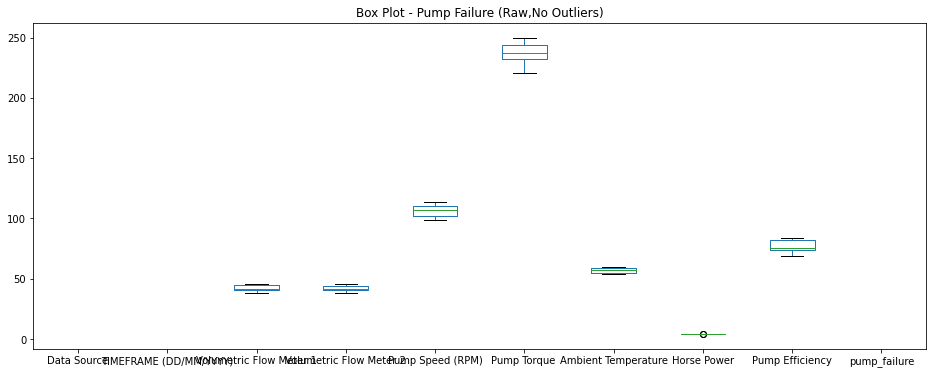

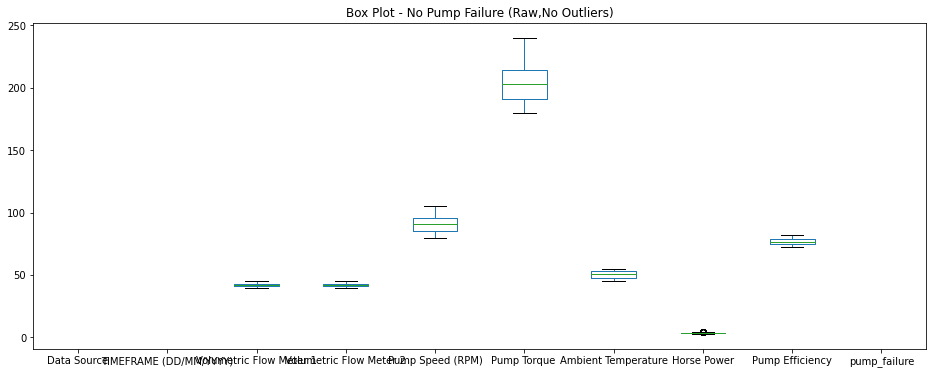

In [42]:
# raw data box plots without outliers
# 
# i boxplot when PUMP FAILURE is 1, no outliers, raw data

stripped_raw_pf = pump_fail_raw[(pump_fail_raw > (Q1_raw - (1.5 * IQR_raw))) & (pump_fail_raw < (Q3_raw + (1.5 * IQR_raw)))]

print(stripped_raw_pf.plot(kind='box', title='Box Plot - Pump Failure (Raw,No Outliers)', figsize=(16,6)))

#ii boxplot when PUMP FAILURE is 0, no outliers, raw data

stripped_raw_npf = pump_not_fail_raw[(pump_not_fail_raw > (Q1_raw - (1.5 * IQR_raw))) & (pump_not_fail_raw < (Q3_raw + (1.5 * IQR_raw)))]

print(stripped_raw_npf.plot(kind='box', title='Box Plot - No Pump Failure (Raw,No Outliers)', figsize=(16,6)))



AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


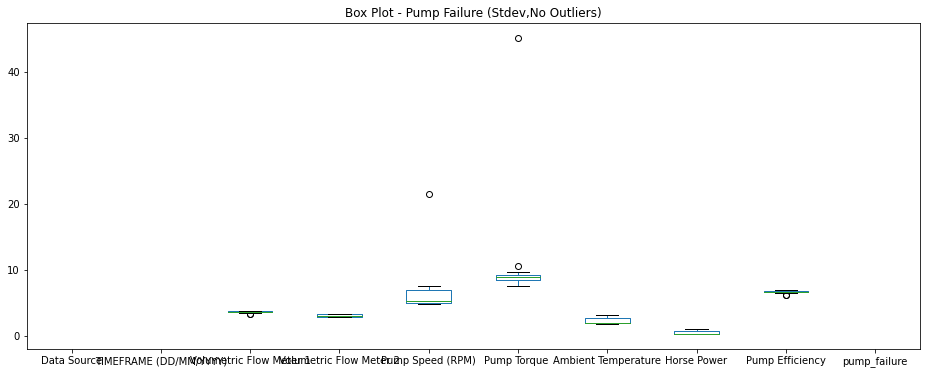

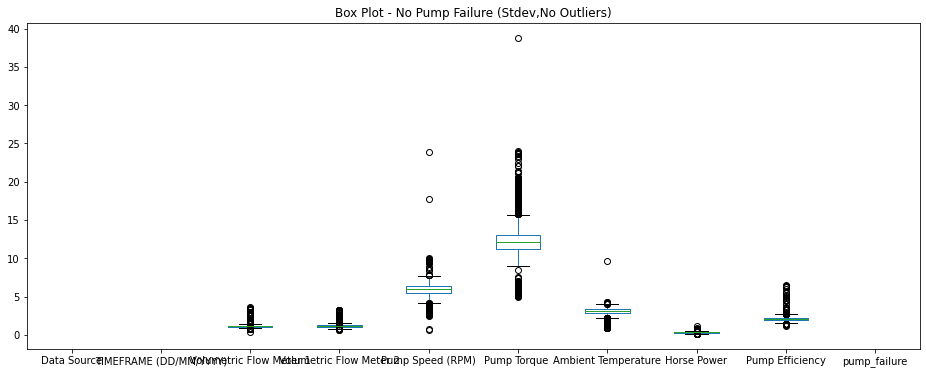

In [43]:
# stdev data box plots without outliers
# 
# i boxplot when PUMP FAILURE is 1, no outliers, stdev data

stripped_stdev_pf = pump_fail_stdev[(pump_fail_stdev > (Q1_stdev - (1.5 * IQR_stdev))) & (pump_fail_stdev < (Q3_stdev + (1.5 * IQR_stdev)))]

print(stripped_stdev_pf.plot(kind='box', title='Box Plot - Pump Failure (Stdev,No Outliers)', figsize=(16,6)))

#ii boxplot when PUMP FAILURE is 0, no outliers, stdev data

stripped_stdev_npf = pump_no_fail_stdev[(pump_no_fail_stdev > (Q1_stdev - (1.5 * IQR_stdev))) & (pump_no_fail_stdev < (Q3_stdev + (1.5 * IQR_stdev)))]

print(stripped_stdev_npf.plot(kind='box', title='Box Plot - No Pump Failure (Stdev,No Outliers)', figsize=(16,6)))

### Outliers are important - do not remove for remaining analysis

-----

### Step 8: <span style="color:green">Plotting and Examining Each Column</span> 

In [44]:
#  Commented out to save file space, remove hashes to run plot
#  for col_name in dataframe_raw.columns[2:9]:
       
#     t = dataframe_raw['TIMEFRAME (DD/MM/YYYY)']
#     data1 = dataframe_raw[col_name]
#     data2 = dataframe_raw['pump_failure']


#     fig, ax1 = plt.subplots()

#     color = 'tab:red'
#     ax1.set_xlabel('time')
#     ax1.set_ylabel(col_name, color=color)
#     ax1.plot(t, data1, color=color)
#     ax1.tick_params(axis='y', labelcolor=color)

#     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#     color = 'tab:blue'
#     ax2.set_ylabel('pump failure (1 or 0)', color=color)  # we already handled the x-label with ax1
#     ax2.plot(t, data2, color=color)
#     ax2.tick_params(axis='y', labelcolor=color)

#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     plt.show()

### There seems to be a sharp spike for Horse Power, Ambient Temperature, and Pump Speed prior to a failure

---

### Step 9: <span style="color:green">Plot for Pump Failures Over a Rolling Time Period</span> 


                                      Data Source  ...  pump_failure
TIMEFRAME (DD/MM/YYYY)                             ...              
10/12/2014 13:30        Rolling Stdev (30 Minute)  ...             0
10/12/2014 13:31        Rolling Stdev (30 Minute)  ...             0
10/12/2014 13:32        Rolling Stdev (30 Minute)  ...             0
10/12/2014 13:33        Rolling Stdev (30 Minute)  ...             1
10/12/2014 13:34        Rolling Stdev (30 Minute)  ...             1
...                                           ...  ...           ...
10/12/2014 14:26        Rolling Stdev (30 Minute)  ...             0
10/12/2014 14:27        Rolling Stdev (30 Minute)  ...             0
10/12/2014 14:28        Rolling Stdev (30 Minute)  ...             0
10/12/2014 14:29        Rolling Stdev (30 Minute)  ...             0
10/12/2014 14:30        Rolling Stdev (30 Minute)  ...             0

[61 rows x 9 columns]


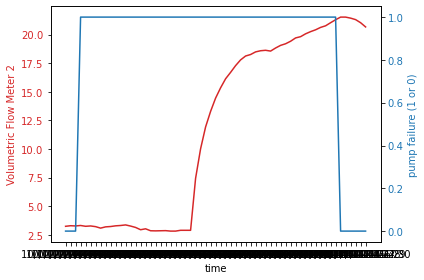

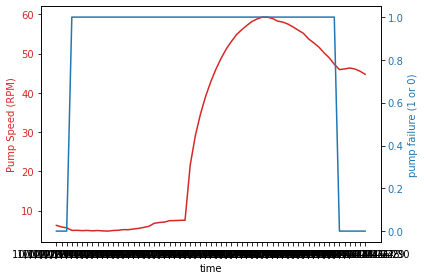

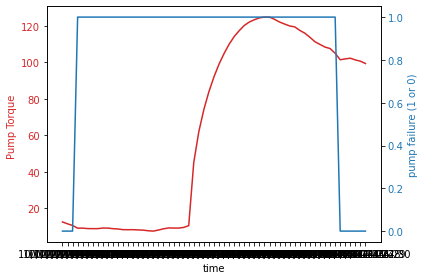

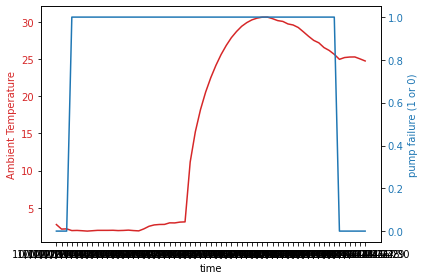

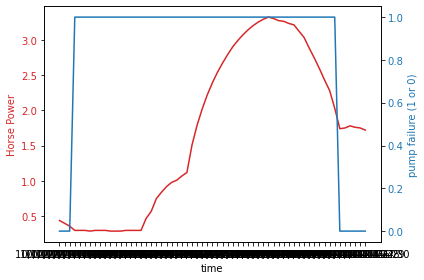

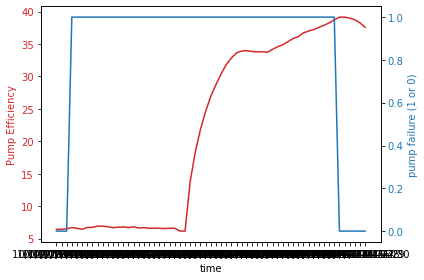

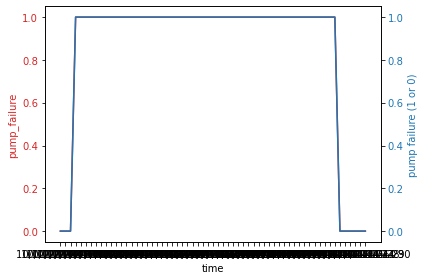

In [45]:

# i set the index to timeframe
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv', header=0)
dataframe_stdev.rename(columns={'PUMP FAILURE (1 or 0)': 'pump_failure'}, inplace=True)

dataframe_stdev = dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

dataframe_time_filtered_stdev = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 13:30") & (dataframe_stdev.index <= "10/12/2014 14:30")]

print(dataframe_time_filtered_stdev)

for col_name in dataframe_time_filtered_stdev.columns[2:9]:
       
    t = dataframe_time_filtered_stdev.index
    data1 = dataframe_time_filtered_stdev[col_name]
    data2 = dataframe_time_filtered_stdev['pump_failure']


    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel(col_name, color=color)
    ax1.plot(t, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('pump failure (1 or 0)', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


In [47]:
#trying other method of filtering
# #tfilt = dataframe_stdev[(dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'] >= "10/12/2014 13:30") & (dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'] <= "10/12/2014 14:30")]

#print(tfilt)

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### Step 10: <span style="color:purple">Heatmap</span> 
i) Heatmap that shows the correlations (including R Squared) for all variables using the dataframe_raw dataset.


Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

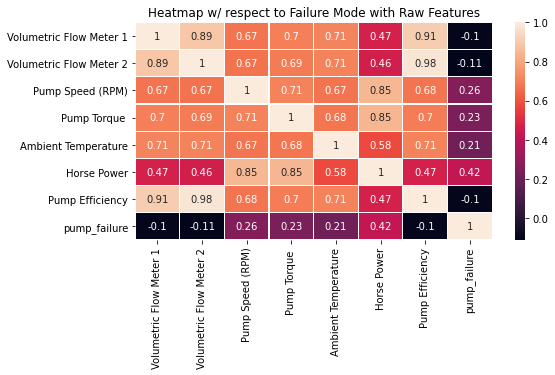

In [48]:
#all options for heatmap:  sns.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

corr = dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1).corr()
fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Raw Features")
plt.show()


#### Note: Horse Power and Torque appear to be most highly correlated with pump failure


### Step 11: <span style="color:purple">Barplot of Correlated Features</span>
Barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

Using matplotlib library matplotlib.pyplot(kind='bar')


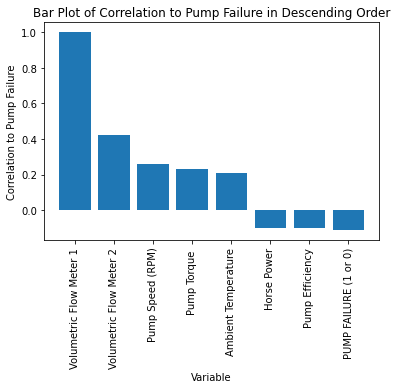

<Figure size 864x432 with 0 Axes>

In [49]:
    
dataframe_raw = pd.read_csv('DF_Raw_Data.csv', header=0)
corr = dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1).corr()
corr_sorted_desc= corr.sort_values('PUMP FAILURE (1 or 0)',ascending=False)
#print(corr)

#for col_name in corr.columns:
    #print(corr['PUMP FAILURE (1 or 0)'])
x = corr_sorted_desc.columns
y = corr_sorted_desc['PUMP FAILURE (1 or 0)']
plt.bar(x, y)
plt.title("Bar Plot of Correlation to Pump Failure in Descending Order")
plt.xlabel('Variable')
plt.ylabel('Correlation to Pump Failure')
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
plt.show()



---

### Step 12: <span style="color:purple">Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the rolling standard deviation dataframe you had imported in Q1.

ii) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_stdev dataset.

Do any variables stand out? If yes, list these out below your heatmap.


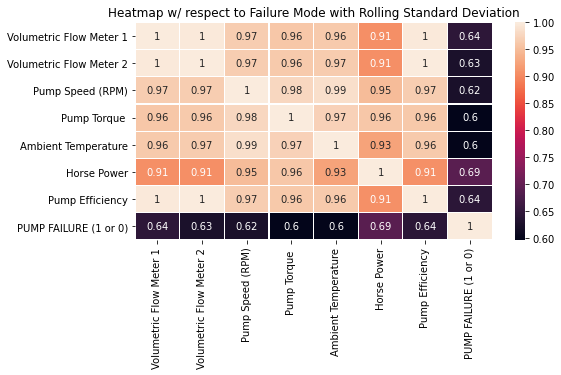

While studying the rolling standard deviation dataset, Deviations in Horse Power followed by Pump Efficiency and Volumetric Flow Meter 1 appear to be strongly correlated to Pump Failure


In [50]:
dataframe_raw = pd.read_csv('DF_Raw_Data.csv', header=0)
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv', header=0)
import seaborn as sns 
corr = dataframe_stdev.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1).corr()
fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Rolling Standard Deviation")
plt.show()

print('While studying the rolling standard deviation dataset, Deviations in Horse Power followed by Pump Efficiency and Volumetric Flow Meter 1 appear to be strongly correlated to Pump Failure')

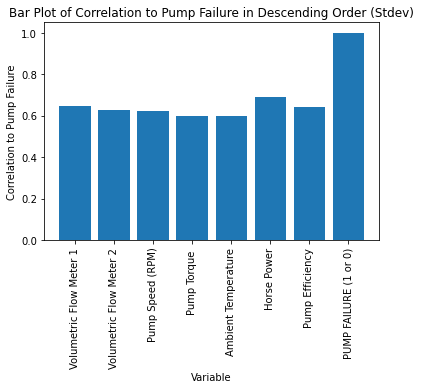

<Figure size 864x432 with 0 Axes>

In [51]:
corr = dataframe_stdev.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1).corr()
corr_sorted_desc= corr.sort_values('PUMP FAILURE (1 or 0)',ascending=False)
#
#print(corr_sorted_desc)

x = corr_sorted_desc.columns
y = corr_sorted_desc.loc['PUMP FAILURE (1 or 0)']
plt.bar(x, y)
plt.title("Bar Plot of Correlation to Pump Failure in Descending Order (Stdev)")
plt.xlabel('Variable')
plt.ylabel('Correlation to Pump Failure')
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
plt.show()

### Multivariate Regression Model


### Step 13: <span style="color:purple">Ordinary Least Square OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, created a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0).

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:
    ## Add a constant to follow the equation form: Ab + x (X = sm.add_constant(X))
    ## Instantiate the Ordinary Least Squares Model with: model = sm.OLS(Y,X) where Y is the dependent variable and X is the independent variable (Make sure you don't include the PUMP FAILURE (1 or 0) in your list of independent variables as this is what you are trying to predict)
    ## Fit the Model (OLSmodelResult = OLSmodel.fit())
    ## Print the OLSModel Summary 

Link: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

ii) Repeat i) but this time use the dataframe_stdev you imported previously. What is the R Squared for the model and what does this signify?



In [52]:
#i OLS Regression
# 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
#can also use SciKitLearn Package but this uses statsmodels.api

#re-import dataset
df = pd.read_csv('DF_Raw_Data.csv')

#pump failure is the dependent variable while other factors are the independent variable
x = df.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)'],axis=1)
y = df['PUMP FAILURE (1 or 0)']

#add constant 
x = sm.add_constant(x)

#instantiate model
model = sm.OLS(y,x)

#fit the model
results = model.fit()

#print summary
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Thu, 04 Feb 2021   Prob (F-statistic):          5.58e-233
Time:                           15:09:39   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [53]:
#i OLS Regression using stdev
# 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
#can also use SciKitLearn Package but this uses statsmodels.api

#re-import dataset
df = pd.read_csv('DF_Rolling_Stdev.csv')

#pump failure is the dependent variable while other factors are the independent variable
x = df.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)'],axis=1)
y = df['PUMP FAILURE (1 or 0)']

#add constant 
x = sm.add_constant(x)

#instantiate model
model = sm.OLS(y,x)

#fit the model
results = model.fit()

#print summary
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                           15:09:39   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Standard Deviation Model appears to be a much better fit and has a higher R Squared.

### Step 14: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this.

0       0.012455
1       0.005693
2       0.001593
3      -0.004978
4      -0.009635
          ...   
2447    0.063612
2448    0.082757
2449    0.089230
2450    0.081646
2451    0.025040
Length: 2452, dtype: float64


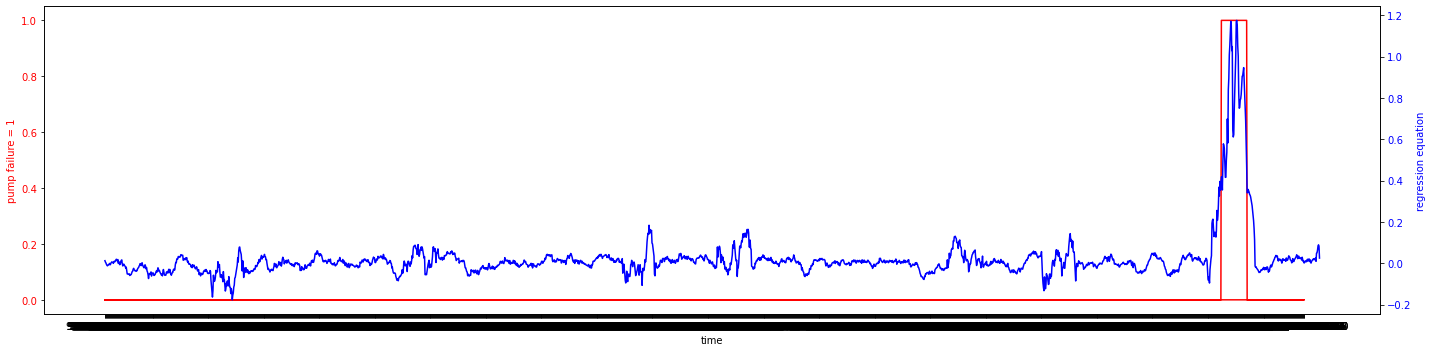

In [6]:
#rc is row column parameters

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
plt.rcParams['figure.figsize'] = (20,5)
#re-import dataset
df = pd.read_csv('DF_Rolling_Stdev.csv')
#pump failure is the dependent variable while other factors are the independent variable
x = df.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)'],axis=1)
y = df['PUMP FAILURE (1 or 0)']
#add constant 
x = sm.add_constant(x)
#instantiate model
model = sm.OLS(y,x)
#fit the model
results = model.fit()
#create a predicted y variable
ypred = results.predict(x)
print(ypred)

       
t = df['TIMEFRAME (DD/MM/YYYY)']
data1 = df['PUMP FAILURE (1 or 0)']
data2 = ypred

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('time')
ax1.set_ylabel('pump failure = 1', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('regression equation', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
       





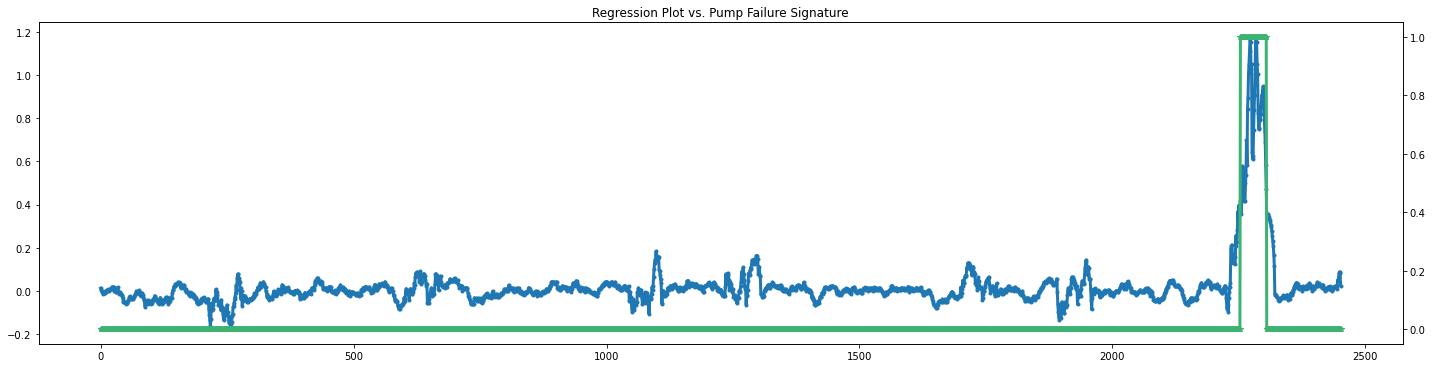

In [5]:
## Other method
## remove hashes to run

# ax = results.predict(x).plot(linewidth=3, marker='.')
# ax2 = ax.twinx()
# ax2.plot(df['PUMP FAILURE (1 or 0)'], 'mediumseagreen', linewidth=3, marker='*')
# plt.tight_layout()
# plt.title("Regression Plot vs. Pump Failure Signature")
# plt.show()